In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

> # 1) Завантажити дані, вивести назви колонок і розмір датасета

### 1.1 Завантаження даних

In [7]:
data = pd.read_csv("WineQT.csv")

### 1.2 Вивід назв колонок

In [8]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

### 1.3 Вивід розміру датасету

In [9]:
data.shape

(1143, 13)

> # 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

### Перевірка, чи є пропуски:

In [10]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#### У даному випадку пропусків нема. Але якби були, можна було б використати dropna(), щоб видалити, або якийсь з методів заповнення (fillna(х), інтерполяція, вручну...)

> # 3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

### 3.1 Heatmap

<Axes: >

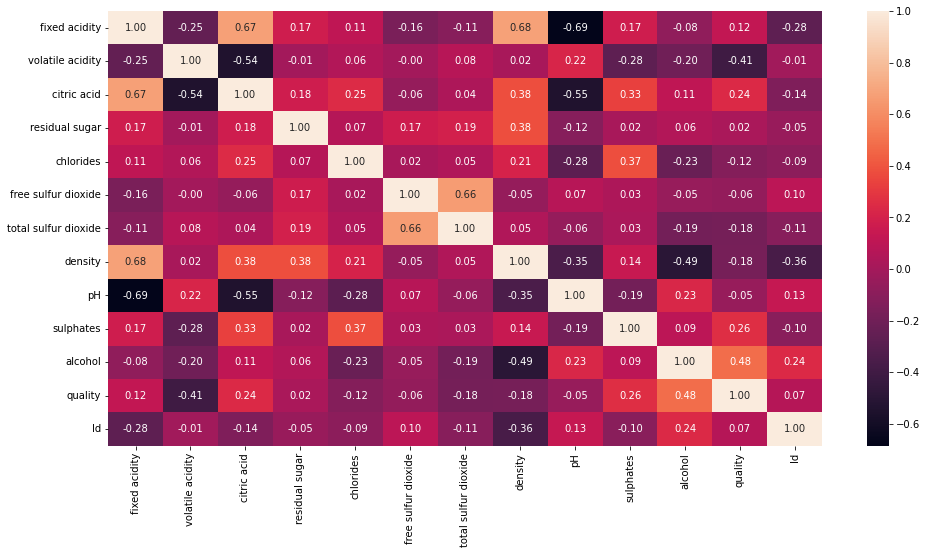

In [11]:
plt.figure(figsize=(16,8))

sns.heatmap(data.corr(),annot=True,fmt=".2f")

### 3.2 Гістограми розподілу ознак (зліва) і boxplot-и (справа) ознак відносно цільової змінної 

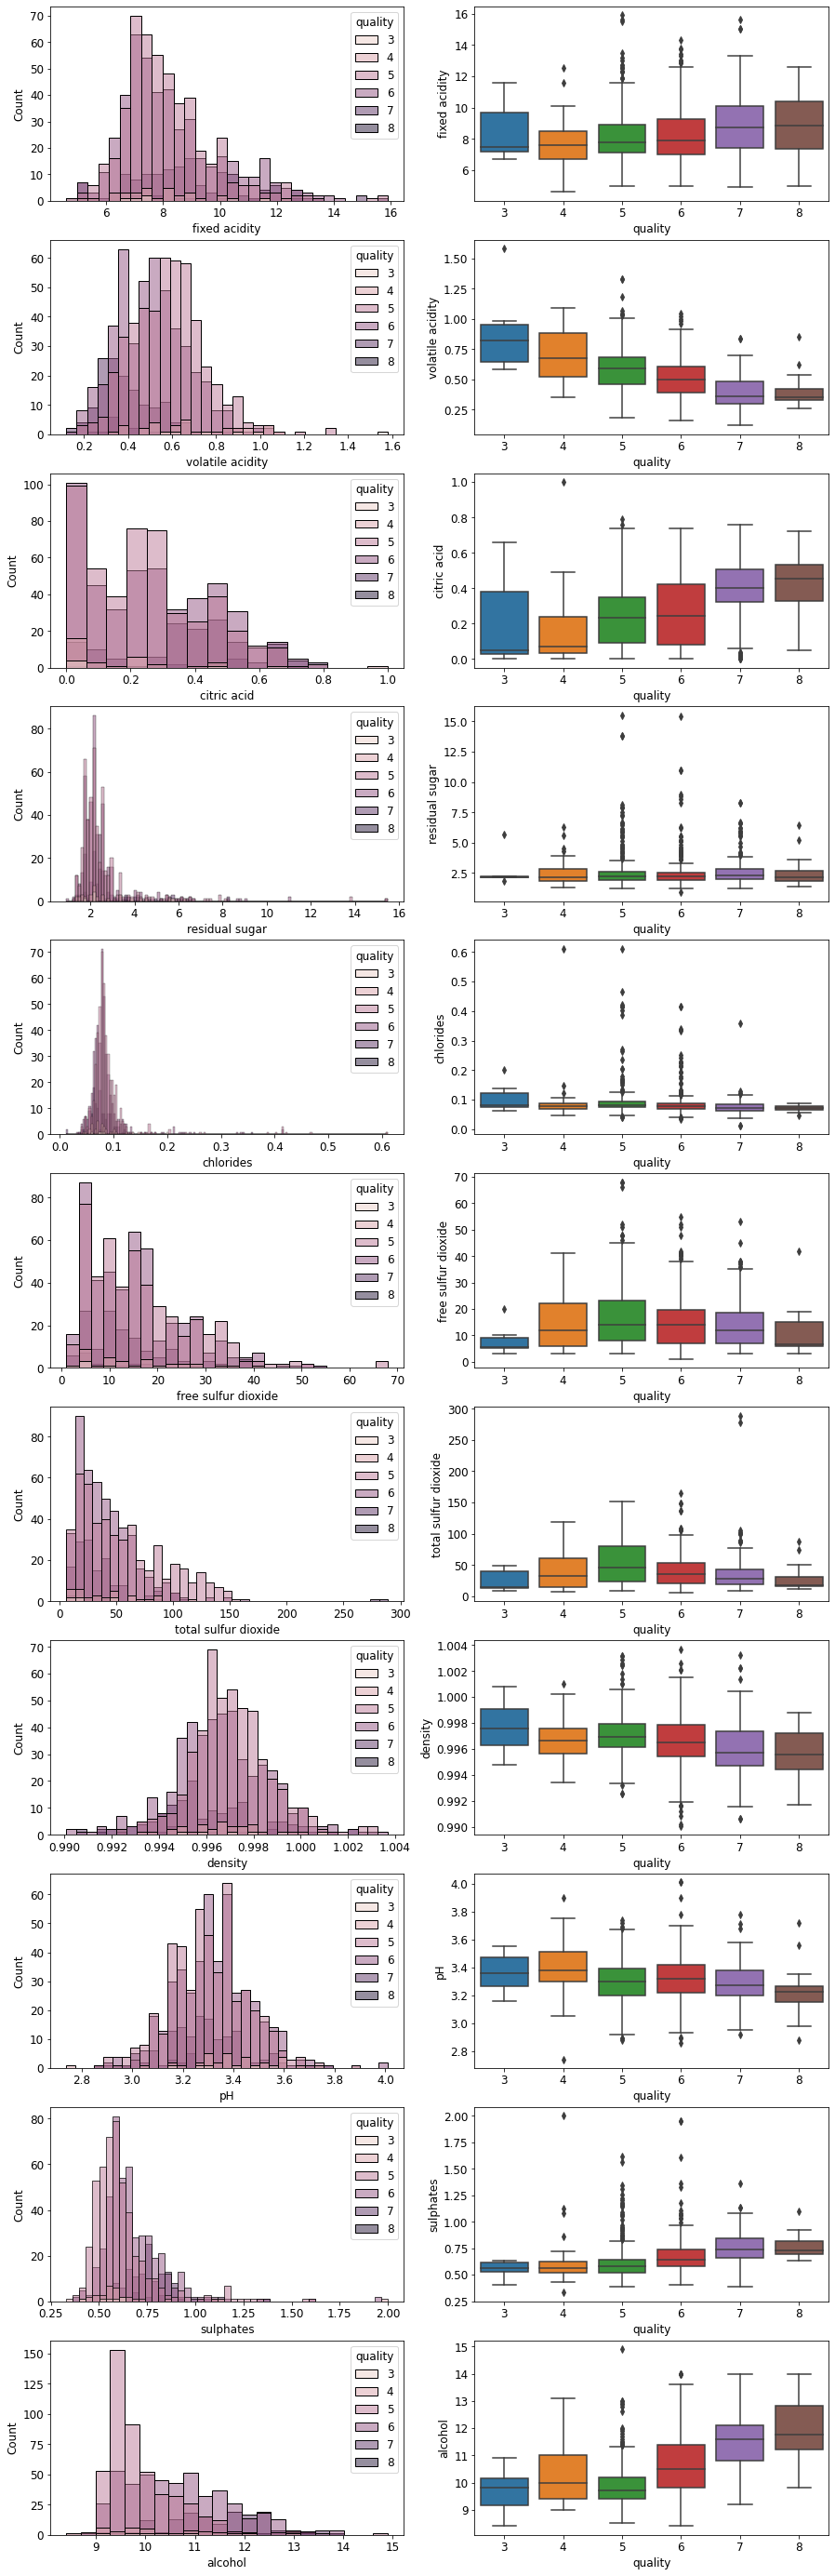

In [12]:
features = data.drop(['quality','Id'],axis=1).columns

plt.rcParams['figure.figsize'] = [15, 50]
plt.rcParams['font.size'] = 12

fig, axs = plt.subplots(11, 2)
for n in range(0, len(features)):
    sns.histplot(data=data, x =features[n],hue="quality", ax = axs[n,0])
    sns.boxplot(data=data, y =features[n],x="quality", ax = axs[n,1])


### 3.3 (додатково*) Гістограма розподілу значень цільової змінної 

Text(0.5, 1.0, 'Countplot for target')

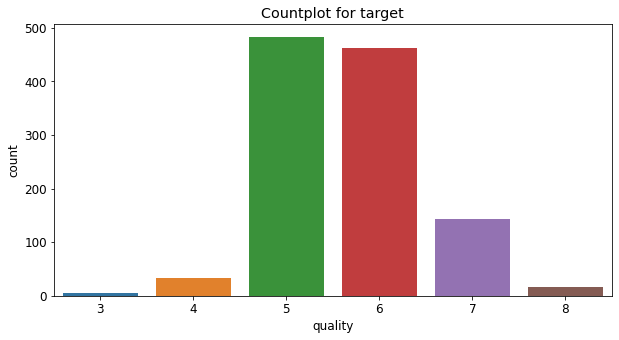

In [18]:
plt.rcParams['figure.figsize'] = [10, 5]

sns.countplot(data.quality)
plt.title("Countplot for target")

> # 4) Нормалізувати дані

In [19]:
X = data[features].values
y = data.quality.values

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=features)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1138,0.150442,0.267123,0.13,0.095890,0.106845,0.417910,0.120141,0.416300,0.535433,0.251497,0.400000
1139,0.194690,0.342466,0.08,0.068493,0.093489,0.402985,0.113074,0.472834,0.535433,0.293413,0.169231
1140,0.141593,0.328767,0.08,0.075342,0.130217,0.462687,0.134276,0.354626,0.559055,0.149701,0.323077
1141,0.115044,0.294521,0.10,0.089041,0.083472,0.567164,0.159011,0.370778,0.614173,0.257485,0.430769


> # 5) Провести навчання наступних класифікаторів:
> ### kNN, дерево прийняття рішень, SVM, Random Forest, AdaBoost

> ## Підібрати оптимальні параметри
> ### • для kNN
> ### • для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

> ## Серед обраних оптимальних моделей кожного класу вибрати найкращу.

> ## Відобразити sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

#### Поділ вибірки на навчання та перевірку (70% на 30%) з пропорційним розподілом представників різних класів 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y)

### 5.1 Навчання класифікаторів дерево прийняття рішень, Random Forest, AdaBoost

In [28]:
DS_classifier = DecisionTreeClassifier().fit(X_train,y_train)
RF_classifier = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
AdaBoost_classifier = AdaBoostClassifier(n_estimators=100).fit(X_train,y_train)

### 5.2 Підбір оптимального k-значення для kNN

Text(0, 0.5, 'Error Rate')

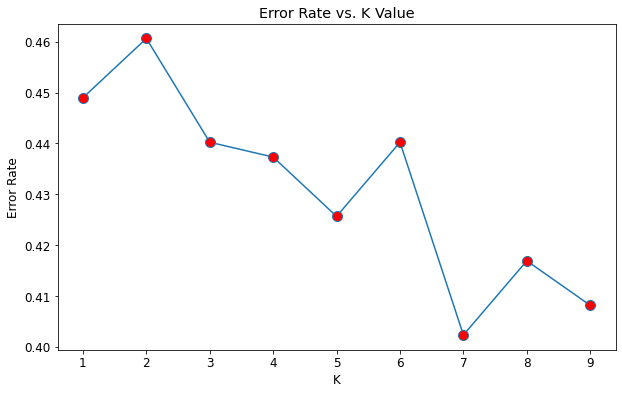

In [29]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate, marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

### Навчання класифікатора knn з оптимальним k

In [30]:
best_k = 7
knn_classifier = KNeighborsClassifier(n_neighbors=best_k).fit(X_train,y_train)

### 5.2.2 Підбір оптимальних "С" та gamma  для SVM за допомогою GridSearch (kernel додатково*) 

In [31]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

### Навчання класифікатора SVC з оптимальними "С" та gamma 

In [32]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.1, kernel='sigmoid')


In [33]:
svm_classifier = SVC(C=100, gamma=0.1, kernel='sigmoid').fit(X_train, y_train)

### 5.3 Відображення sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

In [34]:
reports = []
cms = []
for model in [svm_classifier,knn_classifier,RF_classifier,DS_classifier, AdaBoost_classifier]:
    y_pred = model.predict(X_test)
    reports.append(classification_report(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))

In [35]:
models = ['SVM','KNN','RF','DS','AdaBoost']

for i in range (0,5):
    print(models[i])
    print(reports[i])

SVM
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.66      0.69      0.67       145
           6       0.51      0.70      0.59       138
           7       0.00      0.00      0.00        43
           8       0.00      0.00      0.00         5

    accuracy                           0.57       343
   macro avg       0.19      0.23      0.21       343
weighted avg       0.48      0.57      0.52       343

KNN
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.68      0.70      0.69       145
           6       0.55      0.64      0.59       138
           7       0.45      0.35      0.39        43
           8       0.00      0.00      0.00         5

    accuracy                           0.60       343
   macro avg   

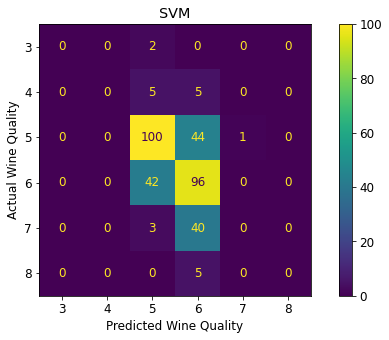

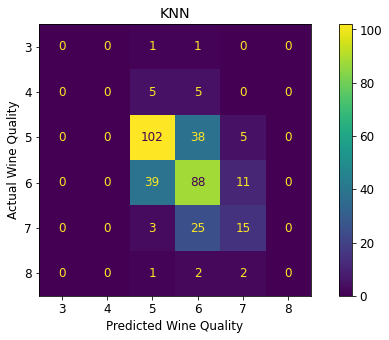

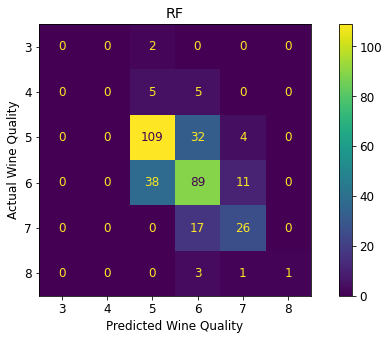

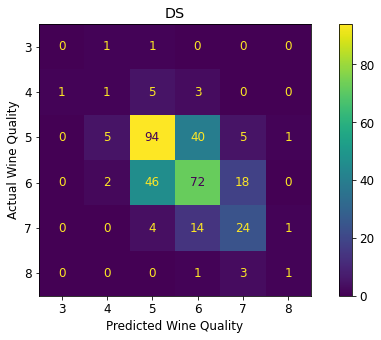

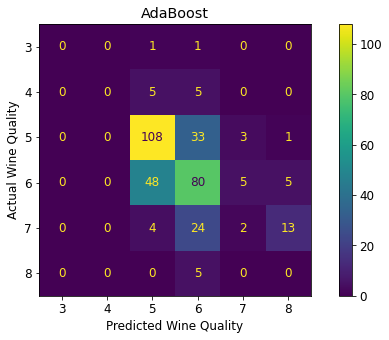

In [36]:
for i in range (0,5):
    cmd_obj = ConfusionMatrixDisplay(cms[i], display_labels=svm_classifier.classes_)
    cmd_obj.plot()
    cmd_obj.ax_.set(
                    title= models[i], 
                    xlabel='Predicted Wine Quality', 
                    ylabel='Actual Wine Quality')
    plt.show()

> ## 5.4 Вибір найкращої моделі

#### Максимальне f1-score (0.65) у класифікатора випадкового лісу (RF). Тому ця модель найкраща серед усіх побудованих.       